SAS & HSE, Applied Time Series Forecasitng , Fall 2022

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл <Surname>_fall2022_hw1.ipynb, например, ivanov_fall2022_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 11-Dec-2022 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

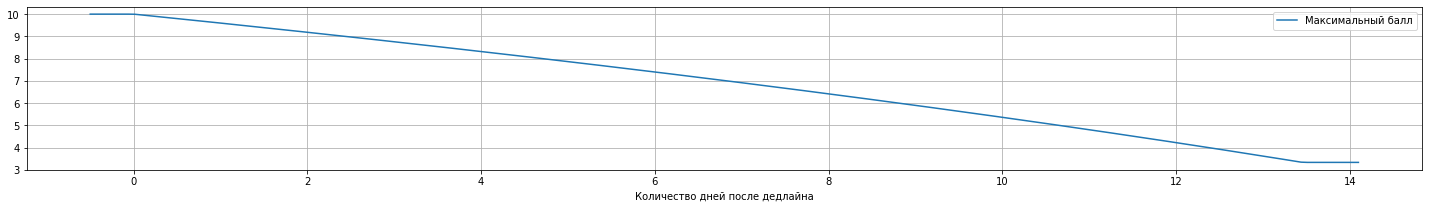

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

Параметр альфа определяет степень сглаживания. При малых значениях альфа (например, 0.1 – 0.2) имеет место сильное сглаживание. При значениях близких к 1, сглаженный ряд практически повторяет исходный ряд с задержкой на один период. Для медленно меняющегося ряда часто берут небольшие значения альфа=0.1 , а для быстро меняющегося 0.3-0.5.

**Вопрос 2**: Докажите равенство выражений в $\color{blue}{рекуррентной~форме}$ и в $\color{red} {форме~корректировки~на~ошибку}$ для модели Хольта.

$$        l_t = \color{blue}{\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} )} = \color{red}{\hat y_{t} + \alpha e_t}$$ 

$$b_t = \color{blue}{\beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1}} = \color{red}{b_{t-1}+ \alpha\beta e_t}.$$</td>

Пусть задана система

\begin{equation*}
 \begin{cases}
   \hat y_{t+h} = l_t + h \cdot b_t\\
   l_t = αy_t + (1 - α)(l_{t-1} + b_{t-1})\\
   b_t = β(l_t-l_{t-1}) + (1-β)b_{t-1}
 \end{cases}
\end{equation*}

Если принять $h=1$, то расчетное значение на следующий шаг равно сумме уровня и угла наклона на текущем шаге:

$$ \hat y_{t+1} = l_t + b_t$$

Уровень в таком случае можно записать в другом виде: $l_t = \hat y_t + α(y_t - \hat y_t)$
или в форме коррекции ошибок:

$$l_t = \hat y_t + α(y_t - \hat y_t) = \hat y_t + αe_t$$

Раскроем скобки в формуле угла наклона и вынесем за скобки постоянную сглаживания $β$:
$$b_t = βl_t-βl_{t-1}+b_{t-1}-βb_{t-1}= b_{t-1} + β(l_t-(l_{t-1}+b_{t-1}))$$

Выражение в скобка состоит из двух частей: адаптированного тренда и расчетного значения. Подставим формулы выше в скобки: $b_t = b_{t-1} + β(\hat y + αe_t - \hat y)$ и в результате получим формулу адаптации угла наклона в форме коррекции ошибок:

$$b_t = b_{t-1} + βαe_t$$


**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

1) меньше или равно 0.3 

2) больше 0.3


<h1 align="center"> Practice</h1>

#1. reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "Анализ временных рядов" column C ("ts")



In [76]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

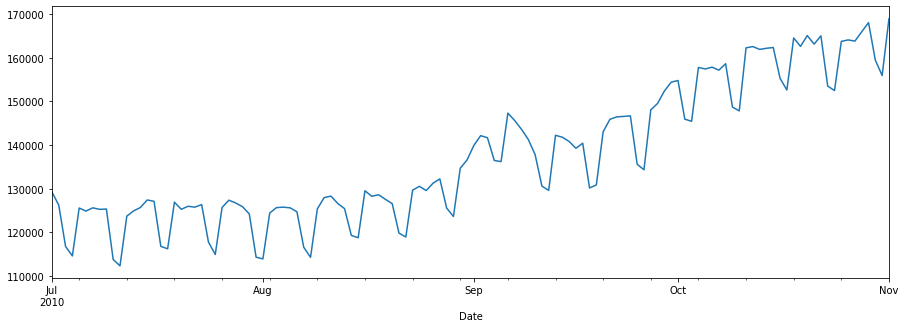

In [77]:
ts = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/energy_consump.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')

ts = ts[(ts['ZSP']=='FZSZOE27') & (ts['Hub']=='Center')]['EnergyConsump']['2010-07-01':'2010-11-01']

ts.plot(figsize=(15,5));

In [78]:
ts = pd.DataFrame(ts, columns = ['EnergyConsump'])

ts

,EnergyConsump
Date,
2010-07-01,129260.119
2010-07-02,126256.804
2010-07-03,116780.200
2010-07-04,114611.759
2010-07-05,125593.593
...,...
2010-10-28,165978.168
2010-10-29,168080.435
2010-10-30,159463.494


 # Полезные функции для реализации задач ниже

In [79]:
def build_forecast(h, ts, alg_name, alg_title, params_array, step='D'):
      
    FRC_TS = dict()

    for p in params_array:
        frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
        frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)

        for cntr in ts.columns:
            frc_ts[cntr] = eval(alg_name)(ts[cntr], h, p)

        FRC_TS['%s %s' % (alg_title, p)] = frc_ts

    return FRC_TS

In [80]:
def plot_ts_forecast(ts, frc_ts, ts_num=0, alg_title=''):
    frc_ts.columns = ts.columns+'; '+alg_title
    ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
    ax = frc_ts[frc_ts.columns[ts_num]].plot(style='r-^', figsize=(25,5), linewidth=1.0)
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    return ax

In [81]:
def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x.abs()).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , qlt

# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



In [82]:
# Simple Exponential Smoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h=1, Params={}):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T + h)
    if alpha > 1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha < 0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    
    # initialization
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = alpha * x[cntr] + (1 - alpha) * y
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

 # 0) Forecast the ts with SES  𝛼=0.1

In [83]:
ESParamsArray = [{'alpha':.1}]
frc_ts_dict = build_forecast(h=1, ts=ts, alg_name='SimpleExponentialSmoothing', alg_title='ES', params_array=ESParamsArray)
FRC_TS = pd.DataFrame(frc_ts_dict["ES {'alpha': 0.1}"]).rename_axis('Date')

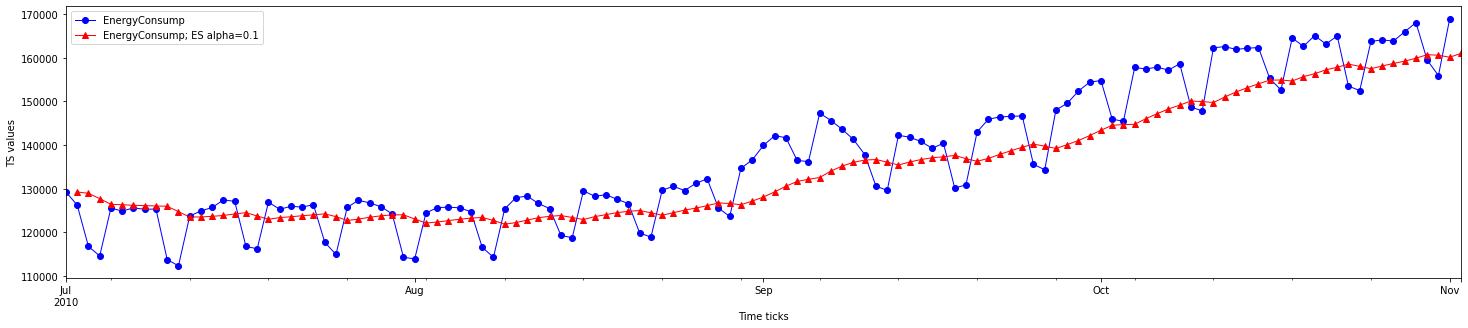

In [84]:
plot_ts_forecast(ts, FRC_TS, ts_num=0, alg_title='ES alpha=0.1');

## 1) Search for the optimal $\alpha$ 

In [85]:
ALPHA = np.linspace(0.01,1,10)
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_TS = build_forecast(h=1, ts=ts, alg_name='SimpleExponentialSmoothing', alg_title='ES', params_array=ESParamsArray)

In [86]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

ix = ts.loc['2010-09-01':'2010-10-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

print(QualityStr[QualityStr.columns].mean().sort_values())

ES {'alpha': 1.0}     0.026751
ES {'alpha': 0.89}    0.028230
ES {'alpha': 0.78}    0.030584
ES {'alpha': 0.67}    0.033185
ES {'alpha': 0.56}    0.035862
ES {'alpha': 0.45}    0.038188
ES {'alpha': 0.34}    0.040425
ES {'alpha': 0.23}    0.042340
ES {'alpha': 0.12}    0.050119
ES {'alpha': 0.01}    0.089169
dtype: float64


## 2) draw the forecast with optimial value $\alpha $

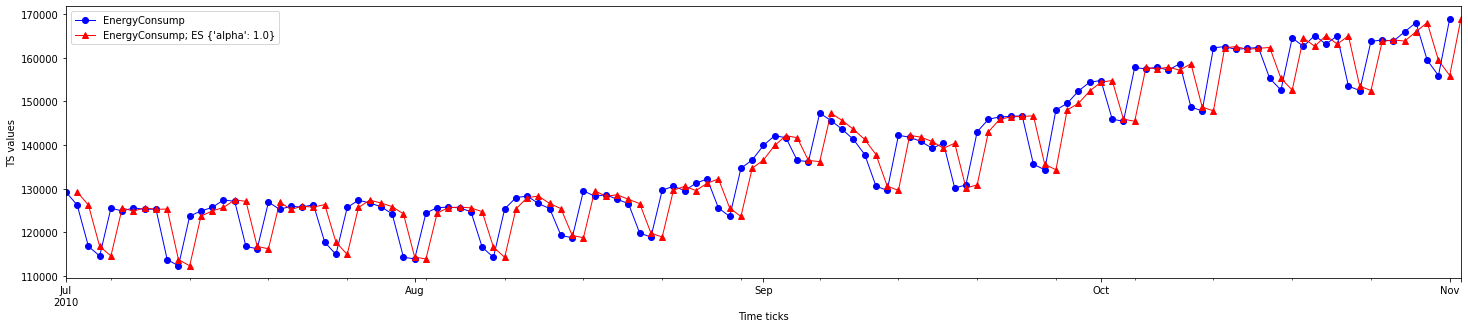

In [87]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts, FRC_TS[alg_name], ts_num=0, alg_title=alg_name);

** Question**
    * Does SES follow to the TS components?

Cглаженный ряд повторяет исходный ряд с задержкой на один период

## 3) Calculate loss of the forecast of TS in 4th part of the time series

In [88]:
qualityMAPE(ts.loc['2010-10-01':], FRC_TS[alg_name].loc['2010-10-01':])[0]

EnergyConsump                      NaN
EnergyConsump; ES {'alpha': 1.0}   NaN
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

In [89]:
def AdditiveWintersExponentialSmoothing(x, h, Params):
    T = len(x)
    
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l = np.NaN
    s = []
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if len(s)==0:
                # looking in the future
                for i in range(p):
                    s.append(x[i])
            if cntr<p:
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*l # recurrent smoothing of level 
            else:
                s.append(gamma*(x[cntr]-l)+(1-gamma)*s[cntr-p])
                l = alpha*(x[cntr]-s[cntr-p])+(1-alpha)*l # recurrent smoothing of level 
        FORECAST[cntr+h] = l + s[cntr + (h % p) - p]
    return FORECAST

In [90]:
ALPHA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

AWParamsArray = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':7} for alpha in ALPHA for gamma in GAMMA]
FRC_AW_TS = build_forecast(h=1, ts=ts, alg_name = 'AdditiveWintersExponentialSmoothing', alg_title='AdditiveWinters'\
                              ,params_array = AWParamsArray)


In [91]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_AW_TS.keys())

ix = ts.loc['2010-09-01':'2010-10-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_aw = FRC_AW_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_aw.loc[ix])

print(QualityStr[QualityStr.columns].mean().sort_values())

AdditiveWinters {'alpha': 1.0, 'gamma': 0.56, 'seasonality_period': 7}     0.013186
AdditiveWinters {'alpha': 1.0, 'gamma': 0.45, 'seasonality_period': 7}     0.013337
AdditiveWinters {'alpha': 1.0, 'gamma': 0.12, 'seasonality_period': 7}     0.013705
AdditiveWinters {'alpha': 1.0, 'gamma': 0.34, 'seasonality_period': 7}     0.013960
AdditiveWinters {'alpha': 0.89, 'gamma': 0.12, 'seasonality_period': 7}    0.014012
                                                                             ...   
AdditiveWinters {'alpha': 0.01, 'gamma': 0.56, 'seasonality_period': 7}    0.040499
AdditiveWinters {'alpha': 0.01, 'gamma': 0.45, 'seasonality_period': 7}    0.044939
AdditiveWinters {'alpha': 0.01, 'gamma': 0.12, 'seasonality_period': 7}    0.046335
AdditiveWinters {'alpha': 0.01, 'gamma': 0.34, 'seasonality_period': 7}    0.047844
AdditiveWinters {'alpha': 0.01, 'gamma': 0.01, 'seasonality_period': 7}    0.278483
Length: 100, dtype: float64


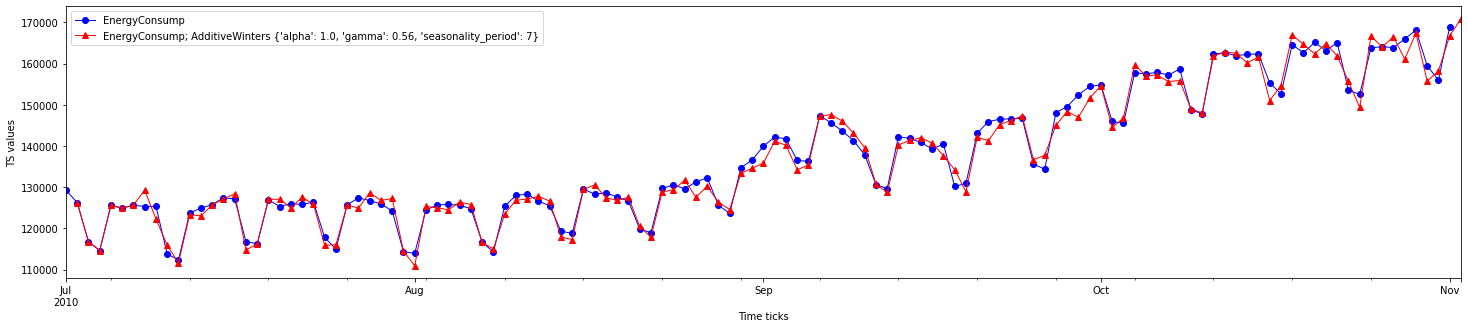

In [92]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[:], FRC_AW_TS[alg_name].loc[:], ts_num=0, alg_title=alg_name);

In [93]:
qualityMAPE(ts.loc['2010-10-01':], FRC_AW_TS[alg_name].loc['2010-10-01':])[0]

EnergyConsump    0.011319
dtype: float64

AdditiveWinters подходит для решения задачи, но он менее точен чем SES при alpha=1

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one? 
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [94]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    b = np.NaN
    s = []
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            if math.isnan(b):
                b = 0
            
            if len(s)==0:
                for i in range(p):
                    s.append(x[i])
                    
                    
            if cntr<p:
                l_old = l
                l = alpha * (x[cntr] - s[cntr]) + (1 - alpha) * (l + b)
                b = beta * (l - l_old) + (1 - beta) * b
            else:
                l_old = l
                s.append(gamma * (x[cntr] - l) + (1 - gamma) * s[cntr - p])
                l = alpha * (x[cntr] - s[cntr - p]) + (1 - alpha) * (l + b)
                b = beta * (l - l_old) + (1 - beta) * b
            
        FORECAST[cntr + h] = l + b + s[cntr + (h % p) - p]
    return FORECAST

In [95]:
ALPHA = np.linspace(0.01,1,10)
BETA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

TWParamsArray = [{'alpha': alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 7} for alpha in ALPHA for gamma in GAMMA for beta in BETA]
FRC_TW_TS = build_forecast(h=1, ts=ts, alg_name='TheilWageExponentialSmoothing', alg_title='TheilWage', params_array=TWParamsArray, step='D')

In [96]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TW_TS.keys())

ix = ts.loc['2010-09-01':'2010-10-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_tw = FRC_TW_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_tw.loc[ix])

print(QualityStr[QualityStr.columns].mean().sort_values())

TheilWage {'alpha': 1.0, 'beta': 0.12, 'gamma': 0.45, 'seasonality_period': 7}     0.012870
TheilWage {'alpha': 1.0, 'beta': 0.23, 'gamma': 0.45, 'seasonality_period': 7}     0.013037
TheilWage {'alpha': 1.0, 'beta': 0.12, 'gamma': 0.56, 'seasonality_period': 7}     0.013063
TheilWage {'alpha': 1.0, 'beta': 0.34, 'gamma': 0.45, 'seasonality_period': 7}     0.013311
TheilWage {'alpha': 1.0, 'beta': 0.45, 'gamma': 0.45, 'seasonality_period': 7}     0.013484
                                                                                     ...   
TheilWage {'alpha': 0.01, 'beta': 0.12, 'gamma': 0.01, 'seasonality_period': 7}    0.625261
TheilWage {'alpha': 0.23, 'beta': 0.89, 'gamma': 1.0, 'seasonality_period': 7}     0.788515
TheilWage {'alpha': 0.34, 'beta': 0.89, 'gamma': 1.0, 'seasonality_period': 7}     0.791401
TheilWage {'alpha': 0.34, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}      1.165224
TheilWage {'alpha': 0.23, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}   

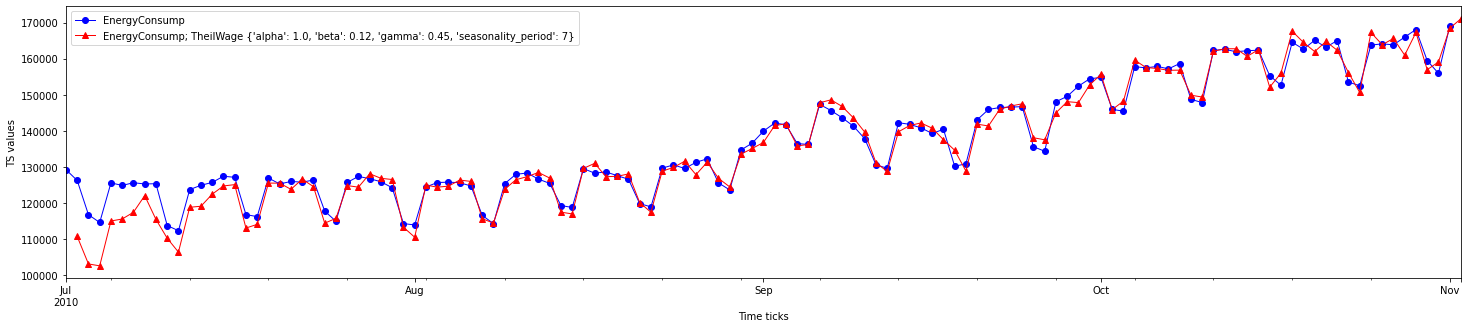

In [97]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[:], FRC_TW_TS[alg_name].loc[:], ts_num=0, alg_title=alg_name);

In [98]:
qualityMAPE(ts.loc['2010-10-01':], FRC_TW_TS[alg_name].loc['2010-10-01':])[0]

EnergyConsump    0.010799
dtype: float64

TheilWage более точен чем AdditiveWinters

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params. 
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

In [99]:
def HoltWintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    b = np.NaN
    s = []
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            if math.isnan(b):
                b = 0
            
            if len(s)==0:
                for i in range(p):
                    s.append(1)                    
                    
            if cntr<p:
                l_old = l
                l = alpha * (x[cntr] / s[cntr]) + (1 - alpha) * (l + b)
                b = beta * (l - l_old) + (1 - beta) * b
            else:
                l_old = l
                s.append(gamma * (x[cntr] / l) + (1 - gamma) * s[cntr - p])
                l = alpha * (x[cntr] / s[cntr - p]) + (1 - alpha) * (l + b)
                b = beta * (l - l_old) + (1 - beta) * b
            
        FORECAST[cntr + h] = (l + b*h) * s[cntr + (h % p) - p]
    return FORECAST

In [100]:
ALPHA = np.linspace(0.01,1,10)
BETA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

HWParamsArray = [{'alpha': alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 7} for alpha in ALPHA for gamma in GAMMA for beta in BETA]
FRC_HW_TS = build_forecast(h=1, ts=ts, alg_name='HoltWintersExponentialSmoothing', alg_title='HoltWinters', params_array=HWParamsArray, step='D')

In [101]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_HW_TS.keys())

ix = ts.loc['2010-09-01':'2010-10-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_hw = FRC_HW_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_hw.loc[ix])

print(QualityStr[QualityStr.columns].mean().sort_values())

HoltWinters {'alpha': 0.78, 'beta': 0.34, 'gamma': 0.23, 'seasonality_period': 7}    0.012163
HoltWinters {'alpha': 0.78, 'beta': 0.45, 'gamma': 0.23, 'seasonality_period': 7}    0.012393
HoltWinters {'alpha': 0.78, 'beta': 0.56, 'gamma': 0.23, 'seasonality_period': 7}    0.012424
HoltWinters {'alpha': 0.78, 'beta': 0.23, 'gamma': 0.23, 'seasonality_period': 7}    0.012469
HoltWinters {'alpha': 0.89, 'beta': 0.34, 'gamma': 0.23, 'seasonality_period': 7}    0.012536
                                                                                       ...   
HoltWinters {'alpha': 0.45, 'beta': 0.89, 'gamma': 1.0, 'seasonality_period': 7}     0.392167
HoltWinters {'alpha': 0.34, 'beta': 0.89, 'gamma': 1.0, 'seasonality_period': 7}     0.397649
HoltWinters {'alpha': 0.23, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}      0.422002
HoltWinters {'alpha': 0.45, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}      0.727266
HoltWinters {'alpha': 0.34, 'beta': 1.0, 'gamma': 1.0, 'seas

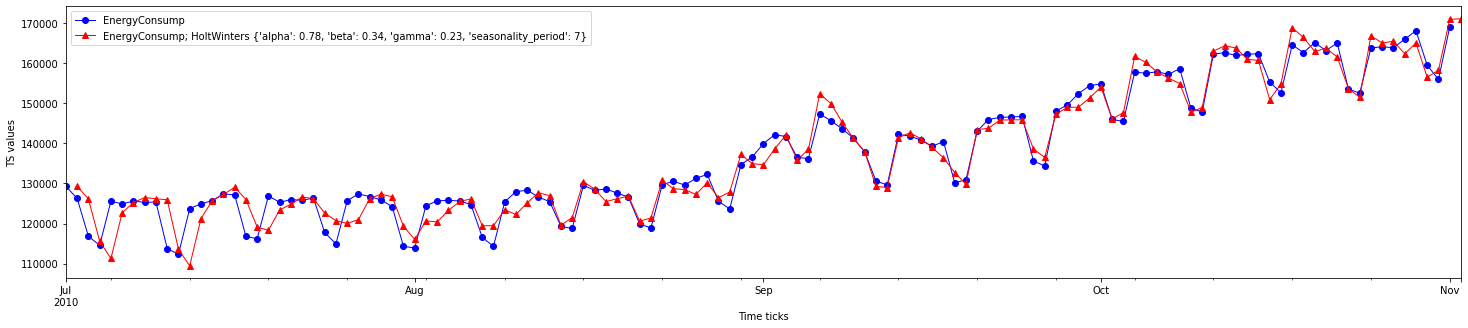

In [102]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[:], FRC_HW_TS[alg_name].loc[:], ts_num=0, alg_title=alg_name);

In [103]:
qualityMAPE(ts.loc['2010-10-01':], FRC_HW_TS[alg_name].loc['2010-10-01':])[0]

EnergyConsump    0.012703
dtype: float64

Эта модель менее точная чем AdditiveWinters и TheilWage. Из этих трех лучшая  - TheilWage

Сравним результаты с h=7

In [104]:
ALPHA = np.linspace(0.01,1,10)
BETA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

HWSParamsArray = [{'alpha': alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 7} for alpha in ALPHA for gamma in GAMMA for beta in BETA]
FRC_HWS_TS = build_forecast(h=7, ts=ts, alg_name='HoltWintersExponentialSmoothing', alg_title='HoltWintersS', params_array=HWSParamsArray, step='D')

In [105]:
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_HWS_TS.keys())

ix = ts.loc['2010-09-01':'2010-10-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_hws = FRC_HWS_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_hws.loc[ix])

print(QualityStr[QualityStr.columns].mean().sort_values())

HoltWintersS {'alpha': 1.0, 'beta': 0.01, 'gamma': 0.01, 'seasonality_period': 7}    0.039357
HoltWintersS {'alpha': 1.0, 'beta': 0.01, 'gamma': 0.78, 'seasonality_period': 7}    0.039408
HoltWintersS {'alpha': 1.0, 'beta': 0.01, 'gamma': 0.89, 'seasonality_period': 7}    0.039459
HoltWintersS {'alpha': 1.0, 'beta': 0.01, 'gamma': 0.67, 'seasonality_period': 7}    0.039484
HoltWintersS {'alpha': 1.0, 'beta': 0.01, 'gamma': 0.12, 'seasonality_period': 7}    0.039499
                                                                                       ...   
HoltWintersS {'alpha': 0.45, 'beta': 1.0, 'gamma': 0.89, 'seasonality_period': 7}    0.982112
HoltWintersS {'alpha': 0.56, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}     1.069169
HoltWintersS {'alpha': 0.45, 'beta': 0.89, 'gamma': 1.0, 'seasonality_period': 7}    1.149091
HoltWintersS {'alpha': 0.45, 'beta': 1.0, 'gamma': 1.0, 'seasonality_period': 7}     1.998182
HoltWintersS {'alpha': 0.34, 'beta': 1.0, 'gamma': 1.0, 'sea

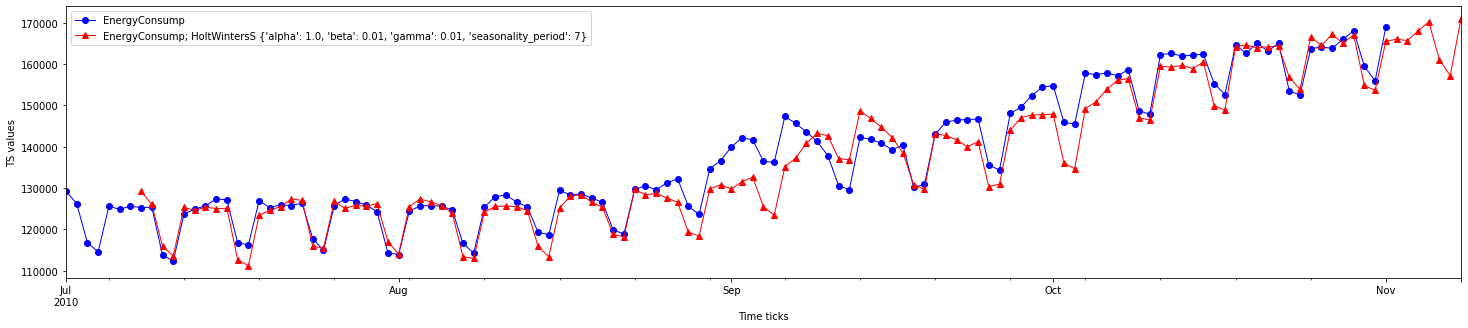

In [106]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[:], FRC_HWS_TS[alg_name].loc[:], ts_num=0, alg_title=alg_name);

In [107]:
qualityMAPE(ts.loc['2010-10-01':], FRC_HWS_TS[alg_name].loc['2010-10-01':])[0]

EnergyConsump    0.020882
dtype: float64

Поменяв горизонт прогноза, получили другие результаты.

Потому что при вычислении очередного значения мы $β$ умножаем на $h$



FORECAST[cntr + h] = (l + b*h) * s[cntr + (h % p) - p]